<a href="https://colab.research.google.com/github/RizkyFahrizal/capstone-project-C242-PS434/blob/main/ml/basedonRasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Embedding
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

In [ ]:
data = pd.read_csv('/content/sample_data/dataset_gabungan_clean.csv')

In [ ]:
taste = data['Tags (manis, gurih, asin, pedas, pahit)']
taste_tags = taste.str.strip().apply(lambda x: x.split(', '))

mlb_tags_taste = MultiLabelBinarizer()
tags_taste = mlb_tags_taste.fit_transform(taste_tags)

In [ ]:
X_train, X_test = train_test_split(tags_taste, test_size=0.2, random_state=42)

In [ ]:
input_taste = Input(shape=(tags_taste.shape[1],))
x = Dense(256, activation='relu')(input_taste)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(tags_taste.shape[1], activation='sigmoid')(x)

In [ ]:
model = Model(inputs=input_taste, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, X_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3276 - loss: 0.6569 - val_accuracy: 0.3696 - val_loss: 0.5464
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4372 - loss: 0.5076 - val_accuracy: 0.3696 - val_loss: 0.3643
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4122 - loss: 0.3264 - val_accuracy: 0.2391 - val_loss: 0.2092
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3194 - loss: 0.2083 - val_accuracy: 0.3261 - val_loss: 0.1238
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3412 - loss: 0.1146 - val_accuracy: 0.3261 - val_loss: 0.0794
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3762 - loss: 0.0754 - val_accuracy: 0.3261 - val_loss: 0.0487
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3586 - loss: 0.0372 - val_accuracy: 0.7826 - val_loss: 0.0250
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6911 - loss: 0.0261 - val_accuracy: 0.3261 - 

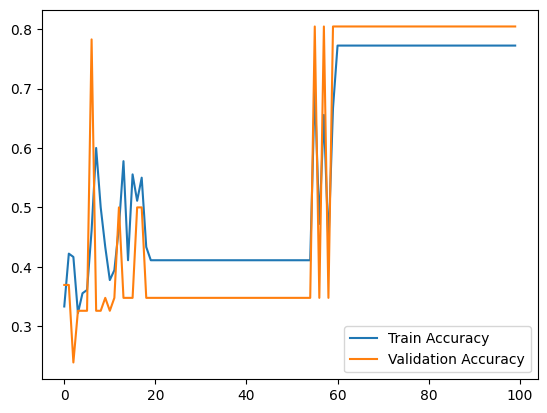

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
embeddings = model.predict(tags_taste)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
def get_similar_items(query_tags, embeddings, data, mlb, top_n=5):

    query_vector = mlb.transform([query_tags.split(', ')])
    similarities = cosine_similarity(query_vector, embeddings).flatten()
    indices = similarities.argsort()[-top_n:][::-1]
    return data.iloc[indices]

In [ ]:
query = "manis, gurih"
recommended_items = get_similar_items(query,embeddings, data['Nama'], mlb_tags_taste)
print(recommended_items)

0                       lappet
211            es kacang merah
25     agar hijau kolak pisang
24                    nagasari
17              lemet singkong
Name: Nama, dtype: object
